In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pandas.io.json import json_normalize

In [2]:
plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [43]:
conn = MongoClient(host='127.0.0.1', port=27017)  # 实例化MongoClient
db = conn.get_database('luo2')  # 连接到CaiXuKun数据库

repost = db.get_collection('repost') # 连接到集合repost
mon_data = repost.find()  # 查询这个集合下的所有记录

In [44]:
repost_data = json_normalize([comment for comment in mon_data])

In [40]:
repost_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4782 entries, 0 to 4781
Data columns (total 91 columns):
_id                                  4782 non-null object
attitudes_count                      4782 non-null int64
bid                                  4782 non-null object
can_edit                             4782 non-null bool
cardid                               193 non-null object
comments_count                       4782 non-null int64
content_auth                         4782 non-null int64
created_at                           4782 non-null object
darwin_tags                          4782 non-null object
favorited                            4782 non-null bool
hide_flag                            4782 non-null int64
id                                   4782 non-null object
isLongText                           4782 non-null bool
is_paid                              4782 non-null bool
mblog_vip_type                       4782 non-null int64
mblogtype                            

In [23]:
repost_data.sample(5)

,_id,content,crawl_time,created_at,org_wbid_uid,repost_device,repost_user_id
1244,5cbff2a5f90a74041641f2b9,返回活到中年的微博,1556083365,NaN,H3GQixVWe_3937348351,NaN,1846600137
1688,5cbffc6bf90a74041641f475,返回最开心的是2018年的夏天的微博,1556085867,NaN,H3GQixVWe_3937348351,NaN,3241570951
6915,5cc067c8f90a7404164208e0,想要拥有汽水音的瓷杯:好刚！！//@Everyxing1007:微博文字部分是对广大品牌说的...,1556113352,,H3GQixVWe_3937348351,来自HUAWEI P20,3254509687
5805,5cc050a2f90a74041642048a,沙雕网友偶来了://@辽宁共青团:请尊重中国和中国人民！ 赞[0] 2018-11-21 1...,1556107426,,H3GQixVWe_3937348351,来自OPPO智能手机,6403591147
7722,5cc07b0af90a740416420c07,瘫一会-:团团刚！！//@Everyxing1007:微博文字部分是对广大品牌说的，图里面四...,1556118282,,H3GQixVWe_3937348351,来自荣耀9 美得有声有色,6078949825


In [27]:
info = db.get_collection('Information')
mon_data = info.find()
info_data = json_normalize([comment for comment in mon_data])
info_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4902 entries, 0 to 4901
Data columns (total 16 columns):
_id                   4902 non-null object
authentication        829 non-null object
birthday              3844 non-null object
brief_introduction    4338 non-null object
city                  1948 non-null object
crawl_time            4902 non-null int64
fans_num              4902 non-null int64
follows_num           4902 non-null int64
gender                4896 non-null object
labels                1907 non-null object
nick_name             4896 non-null object
province              4896 non-null object
sentiment             156 non-null object
sex_orientation       115 non-null object
tweets_num            4902 non-null int64
vip_level             4896 non-null object
dtypes: int64(4), object(12)
memory usage: 612.8+ KB


In [28]:
info_data.head()

,_id,authentication,birthday,brief_introduction,city,crawl_time,fans_num,follows_num,gender,labels,nick_name,province,sentiment,sex_orientation,tweets_num,vip_level
0,2849560641,NaN,巨蟹座,人生在世，谁都会吃屎，但是别嚼,成都,1556076736,84,163,女,美食,芒果奶熙,四川,NaN,NaN,114,未开通
1,2315828514,NaN,1900-12-29,NaN,NaN,1556076740,32,61,女,旅游,心随纸鸢自在飞,上海,NaN,NaN,1565,3级
2,6459746842,NaN,NaN,NaN,NaN,1556076743,3,104,男,NaN,用户6459746842,其他,NaN,NaN,2,未开通
3,5619731927,NaN,金牛座,你是烟花，熙熙攘攘只不过转瞬间。我是云彩，云淡风轻却可以爱很久。,NaN,1556076747,86,91,女,美食,TEA熙云,上海,NaN,NaN,1077,6级
4,6689063831,NaN,射手座,介是罗云熙家的一枚佛系散粉。鉴定完毕！,NaN,1556076751,121,227,女,NaN,云眷熙光心投罗网,陕西,NaN,NaN,2458,3级


In [29]:
merged = pd.merge(info_data, repost_data, left_on='_id', right_on='repost_user_id')
merged.shape

(7858, 23)

In [30]:
len(repost_data.repost_user_id.unique())

4920

In [37]:
merged.head()

,_id_x,authentication,birthday,brief_introduction,city,crawl_time_x,fans_num,follows_num,gender,labels,...,sex_orientation,tweets_num,vip_level,_id_y,content,crawl_time_y,created_at,org_wbid_uid,repost_device,repost_user_id
0,2849560641,NaN,巨蟹座,人生在世，谁都会吃屎，但是别嚼,成都,1556076736,84,163,女,美食,...,NaN,114,未开通,5cbfd882f90a740187b120ff,芒果奶熙:尊重是一切最基本的遵循//@罗云熙Leo:尊重是一切最基本的遵循 赞[0] 03月...,1556076674,,H3GQixVWe_3937348351,来自 iPhone客户端,2849560641
1,2849560641,NaN,巨蟹座,人生在世，谁都会吃屎，但是别嚼,成都,1556076736,84,163,女,美食,...,NaN,114,未开通,5cbfdb11f90a74041641ee0a,芒果奶熙:尊重是一切最基本的遵循//@罗云熙Leo:尊重是一切最基本的遵循 赞[0] 03月...,1556077329,,H3GQixVWe_3937348351,来自 iPhone客户端,2849560641
2,2315828514,NaN,1900-12-29,NaN,NaN,1556076740,32,61,女,旅游,...,NaN,1565,3级,5cbfd884f90a740187b12101,心随纸鸢自在飞:有你@罗云熙Leo 相伴，不惧风雨。快来为TA应援吧 //@罗云熙Leo:...,1556076676,,H3GQixVWe_3937348351,来自明星ALL榜,2315828514
3,2315828514,NaN,1900-12-29,NaN,NaN,1556076740,32,61,女,旅游,...,NaN,1565,3级,5cbfdb1cf90a74041641ee14,心随纸鸢自在飞:有你@罗云熙Leo 相伴，不惧风雨。快来为TA应援吧 //@罗云熙Leo:...,1556077340,,H3GQixVWe_3937348351,来自明星ALL榜,2315828514
4,6459746842,NaN,NaN,NaN,NaN,1556076743,3,104,男,NaN,...,NaN,2,未开通,5cbfd888f90a740187b12104,用户6459746842://@六小龄童:自取其辱 赞[0] 2018-12-20 15:5...,1556076680,,H3GQixVWe_3937348351,来自荣耀Note10 大屏旗舰,6459746842


In [45]:
repost_data.to_csv('luo_all_cols.csv')

#### 1. 数据清洗
由于数据入库的时候没有进行清洗，所以数据多出了很多没用的字段，需要先清洗掉

In [7]:
data.columns

Index(['_id', 'attitudes_count', 'bid', 'can_edit', 'cardid', 'comments_count',
       'content_auth', 'created_at', 'darwin_tags', 'favorited', 'hide_flag',
       'id', 'isLongText', 'is_paid', 'mblog_vip_type', 'mblogtype', 'mid',
       'more_info_type', 'pending_approval_count', 'pic_ids', 'pic_types',
       'pid', 'raw_text', 'reposts_count', 'reward_exhibition_type',
       'show_additional_indication', 'source', 'user.avatar_hd',
       'user.badge.anniversary', 'user.badge.asiad_2018',
       'user.badge.bind_taobao', 'user.badge.cz_wed_2017', 'user.badge.dailv',
       'user.badge.dailv_2018', 'user.badge.denglong_2019',
       'user.badge.double11_2018', 'user.badge.dzwbqlx_2016',
       'user.badge.follow_whitelist_video', 'user.badge.fu_2019',
       'user.badge.gongyi', 'user.badge.gongyi_level',
       'user.badge.hongbaofei_2019', 'user.badge.kpl_2018',
       'user.badge.league_badge', 'user.badge.lol_gm_2017',
       'user.badge.lol_msi_2017', 'user.badge.lol_s8',
  

In [8]:
in_columns = ['attitudes_count', 'comments_count', 'reposts_count', 'mid', 'raw_text', 
          'source', 'user.description', 'user.follow_count', 'user.followers_count', 
          'user.gender', 'user.id', 'user.mbrank', 'user.mbtype', 'user.profile_url', 
          'user.profile_image_url', 'user.screen_name', 'user.statuses_count', 
          'user.urank', 'user.verified', 'user.verified_reason']

In [9]:
data = data[in_columns]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4782 entries, 0 to 4781
Data columns (total 20 columns):
attitudes_count           4782 non-null int64
comments_count            4782 non-null int64
reposts_count             4782 non-null int64
mid                       4782 non-null object
raw_text                  4782 non-null object
source                    4782 non-null object
user.description          4782 non-null object
user.follow_count         4782 non-null int64
user.followers_count      4782 non-null int64
user.gender               4782 non-null object
user.id                   4782 non-null int64
user.mbrank               4782 non-null int64
user.mbtype               4782 non-null int64
user.profile_url          4782 non-null object
user.profile_image_url    4782 non-null object
user.screen_name          4782 non-null object
user.statuses_count       4782 non-null int64
user.urank                4782 non-null int64
user.verified             4782 non-null bool
user.verifie

In [12]:
data.to_csv('cai.csv', index=False)

(4782, 20)

问题：
1. 蔡徐坤的微博转发是否存在假流量？
2. 真假流量所占的比例各有多少？
3. 假流量粉丝是如何生产出来的？
4. 真流量粉的粉丝画像

### 1. 蔡徐坤的微博转发是否存在假流量？

In [184]:
#================================================= changed data

# data = luoall.copy()
data = pd.read_csv('luo_all.csv')
data.info()

#================================================= changed data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8788 entries, 0 to 8787
Data columns (total 21 columns):
Unnamed: 0                8788 non-null int64
attitudes_count           8788 non-null int64
comments_count            8788 non-null int64
reposts_count             8788 non-null int64
mid                       8788 non-null int64
raw_text                  8788 non-null object
source                    8733 non-null object
user.description          4574 non-null object
user.follow_count         8788 non-null int64
user.followers_count      8788 non-null int64
user.gender               8788 non-null object
user.id                   8788 non-null int64
user.mbrank               8788 non-null int64
user.mbtype               8788 non-null int64
user.profile_url          8788 non-null object
user.profile_image_url    8788 non-null object
user.screen_name          8788 non-null object
user.statuses_count       8788 non-null int64
user.urank                8788 non-null int64
user.verifie

In [217]:
# 先来看看蔡徐坤的粉丝性别比例
fans_num = data['user.gender'].value_counts()
fans_num

f    4876
m    3912
Name: user.gender, dtype: int64

In [218]:
from pyecharts import Bar

bar = Bar("蔡徐坤粉丝性别比例初探", width = 600,height=500)
bar.add("(总数据102313条)", ['女', '男'], fans_num.values, is_stack=True, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True)
bar

In [107]:
np.round(fans_num/fans_num.sum()*100, 2)

f    65.67
m    34.33
Name: user.gender, dtype: float64

In [58]:
data[data['user.gender']=='m'].sample(5)

,attitudes_count,comments_count,reposts_count,mid,raw_text,source,user.description,user.follow_count,user.followers_count,user.gender,user.id,user.mbrank,user.mbtype,user.profile_url,user.profile_image_url,user.screen_name,user.statuses_count,user.urank,user.verified,user.verified_reason
6936,0,0,0,4311009847898746,#罗云熙掮客#[熊猫]//@罗云熙吧官博:尊重是一切最基本的遵循//@罗云熙Leo:尊重是一...,红米Note 3,罗云熙最忠实的罗狮粉,35,1576,m,5593829689,2,11,https://m.weibo.cn/u/5593829689?uid=5593829689,https://tvax4.sinaimg.cn/crop.0.0.751.751.180/...,罗云熙最忠实的罗狮粉,55434,33,True,罗云熙超话粉丝大咖
4771,0,0,0,4309256842980631,//@罗云熙Leo: 尊重是一切最基本的遵循,明星势力榜,NaN,12,1,m,6809782250,0,0,https://m.weibo.cn/u/6809782250?uid=6809782250,https://tvax3.sinaimg.cn/default/images/defaul...,用户0946667751,168,4,False,NaN
6372,0,0,0,4309111749029630,门在那边，请自觉离开,Android,NaN,1,1,m,6840736486,0,0,https://m.weibo.cn/u/6840736486?uid=6840736486,https://tvax3.sinaimg.cn/default/images/defaul...,用户6840736486,25,2,False,NaN
8013,0,0,0,4316478397948637,分分钟为@罗云熙Leo 打电话，打到欠费 [偷乐]。快来为TA应援吧 //@罗云熙Leo:...,明星ALL榜,NaN,91,33,m,6242601006,3,12,https://m.weibo.cn/u/6242601006?uid=6242601006,https://tvax1.sinaimg.cn/crop.0.0.1125.1125.18...,璇玑之璇,1492,9,False,NaN
5992,0,0,0,4309144461042890,外资若不尊重中国，不如离开,Android,NaN,1,1,m,6841887342,0,0,https://m.weibo.cn/u/6841887342?uid=6841887342,https://tvax2.sinaimg.cn/crop.0.0.35.40.180/00...,用户6841887342,31,3,False,NaN


### 2. 真假流量所占的比例各有多少？

In [193]:
data[data['user.description']==''].shape
# data['user.description'].isna()

(0, 21)

In [226]:
data_fake = data[((data['user.follow_count']<=5)|(data['user.followers_count']<=5))&
                 (data['user.description'].isna())&
                 (data['comments_count']==0)&
                (data['attitudes_count']==0)&
                (data['reposts_count']==0)&
                (data['user.mbrank']==0)]

# data_fake = data[data['user.description']=='']
data_fake.sample(5)

,attitudes_count,comments_count,reposts_count,mid,raw_text,source,user.description,user.follow_count,user.followers_count,user.gender,...,user.profile_image_url,user.screen_name,user.statuses_count,user.urank,user.verified,user.verified_reason,fake,gender,yonghu,source_cat
3676,0,0,0,4309090249280960,懂得尊重方得始终,Android,NaN,1,1,m,...,https://tvax1.sinaimg.cn/default/images/defaul...,用户6841866836,25,2,False,NaN,1,1,1,4
6021,0,0,0,4309144087404770,坦诚也是双赢的基础,Android,NaN,1,1,m,...,https://tvax1.sinaimg.cn/crop.0.0.40.40.180/00...,用户6840753430,31,3,False,NaN,1,1,1,4
5669,0,0,0,4309164299743299,外资若不尊重中国，不如离开,Android,NaN,1,1,m,...,https://tvax3.sinaimg.cn/crop.0.0.40.40.180/00...,用户6841886053,56,3,False,NaN,1,1,1,4
5194,0,0,0,4309200987891170,遵循尊重的原则交往,Android,NaN,1,1,m,...,https://tvax4.sinaimg.cn/crop.0.0.40.40.180/00...,用户6840748227,43,3,False,NaN,1,1,1,4
3863,0,0,0,4309084309565502,[鲜花]//@今天喜欢罗云熙:敬人者人恒敬之//@罗云熙数据组:一切努力奋斗，都是为了捍卫🇨...,Android,NaN,60,3,m,...,https://tvax3.sinaimg.cn/crop.0.0.180.180.180/...,消-灭土豆,315,4,False,NaN,1,1,0,4


In [227]:
data_fake.shape

(2411, 24)

In [196]:
# 昵称里包含“用户”的，基本上可以断定是假粉丝
data_fake2_index = data[(data['user.follow_count']>5)&
                        (data['user.followers_count']>5)&
                        (data['user.screen_name'].str.contains('用户'))].index

In [197]:
# 把假的流量粉丝转发组合起来
data_fake = pd.concat([data_fake, data.iloc[data_fake2_index]])

In [198]:
data_fake.shape

(2512, 21)

In [199]:
# 取出真粉的转发
data_true = data.drop(data_fake.index)

In [200]:
data_true.shape

(6276, 21)

In [201]:
print('真粉丝转发数占总转发数的{}%'.format(np.round(data_true.shape[0]/data.shape[0]*100, 2)))
print('假粉丝转发数占总转发数的{}%'.format(np.round(data_fake.shape[0]/data.shape[0]*100, 2)))

真粉丝转发数占总转发数的71.42%
假粉丝转发数占总转发数的28.58%


In [202]:
bar = Bar("蔡徐坤真假流量的转发量", width = 600,height=500)
bar.add("(总数据102313条)", ['总转发量', '假粉丝转发量', '真粉丝转发量'], 
        [data.shape[0], data_fake.shape[0], data_true.shape[0]], is_stack=True, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True)
bar

In [203]:
real_fans_num = data_true.drop_duplicates(subset='user.id').shape[0]

In [204]:
bar = Bar("蔡徐坤真假流量的转发量与真实转发粉丝量(总数据102313条)", width = 600,height=500)
bar.add('', ['总转发量', '假粉丝转发量', '真粉丝转发量', '真实转发粉丝量'], 
        [data.shape[0], data_fake.shape[0], data_true.shape[0], real_fans_num], is_stack=True, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True, xaxis_rotate=20)
bar

In [205]:
print('真实转发粉丝量占总转发数的{}%'.format(np.round(real_fans_num/data.shape[0]*100, 2)))

真实转发粉丝量占总转发数的20.45%


-----------------吴青峰微博数据做对比-----------------

In [193]:
db = conn.get_database('WuQingFeng')  # WuQingFeng

repost = db.get_collection('repost') # repost
mon_data = repost.find()  # 查询这个集合下的所有记录

In [194]:
wqf_data = json_normalize([comment for comment in mon_data])

In [195]:
wqf_data = wqf_data[in_columns]

In [196]:
wqf_data.shape

(10006, 20)

In [229]:
wqf_data_fake = wqf_data[((wqf_data['user.follow_count']<=5)|(wqf_data['user.followers_count']<=5))&
                         (wqf_data['user.description']=='')&
                         (wqf_data['comments_count']==0)&
                         (wqf_data['attitudes_count']==0)&
                         (wqf_data['reposts_count']==0)&
                         (wqf_data['user.mbrank']==0)]

wqf_data_fake2_index = wqf_data[(wqf_data['user.follow_count']>5)&
                                (wqf_data['user.followers_count']>5)&
                                (wqf_data['user.screen_name'].str.contains('用户'))].index
wqf_data_fake = pd.concat([wqf_data_fake, wqf_data.iloc[wqf_data_fake2_index]])
wqf_data_true = wqf_data.drop(wqf_data_fake.index)

In [230]:
print('吴青峰真粉丝转发数占总转发数的{}%'.format(np.round(wqf_data_true.shape[0]/wqf_data.shape[0]*100, 2)))
print('吴青峰假粉丝转发数占总转发数的{}%'.format(np.round(wqf_data_fake.shape[0]/wqf_data.shape[0]*100, 2)))

吴青峰真粉丝转发数占总转发数的96.52%
吴青峰假粉丝转发数占总转发数的3.48%


In [231]:
bar = Bar("吴青峰真假流量的转发量", width = 600,height=500)
bar.add("(总数据10006条)", ['总转发量', '假粉丝转发量', '真粉丝转发量'], 
        [wqf_data.shape[0], wqf_data_fake.shape[0], wqf_data_true.shape[0]], is_stack=True,
        xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True)
bar

In [232]:
wqf_real_fans_num = wqf_data_true.drop_duplicates(subset='user.id').shape[0]

bar = Bar("吴青峰真假流量的转发量与真实转发粉丝量(总数据10006条)", width = 600,height=500)
bar.add('', ['总转发量', '假粉丝转发量', '真粉丝转发量', '真实转发粉丝量'], 
        [wqf_data.shape[0], wqf_data_fake.shape[0], wqf_data_true.shape[0], 
         wqf_real_fans_num], is_stack=True, 
        xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True, xaxis_rotate=20)
bar

In [237]:
wqf_data.sample(5)

,attitudes_count,comments_count,reposts_count,mid,raw_text,source,user.description,user.follow_count,user.followers_count,user.gender,user.id,user.mbrank,user.mbtype,user.profile_url,user.profile_image_url,user.screen_name,user.statuses_count,user.urank,user.verified,user.verified_reason
6149,1,0,0,4347751288499206,爱母亲一生一世,红米Redmi,,32,31,m,5676300325,0,0,https://m.weibo.cn/u/5676300325?uid=5676300325,https://tvax1.sinaimg.cn/crop.0.0.996.996.180/...,只抓猪猪打,4,4,False,NaN
3805,23,4,11,4347895002290957,哭//@囤仔:今日催泪弹,iPhone客户端,公主号：饭饭哒 混干皮，会写功课会发壁纸ヾ(･ω･*)ﾉ,435,717510,f,2273529342,6,12,https://m.weibo.cn/u/2273529342?uid=2273529342,https://tvax1.sinaimg.cn/crop.11.0.728.728.180...,饭饭饭饭哒,3380,47,False,NaN
6141,0,0,0,4347750722696051,转发微博,iPhone客户端,诗酒趁年华.,458,142,f,5846588842,0,0,https://m.weibo.cn/u/5846588842?uid=5846588842,https://tvax4.sinaimg.cn/crop.0.0.640.640.180/...,阿羽想当锦鲤大王,1350,9,False,NaN
760,0,0,0,4348436402625735,今日的晚安曲，晚安。[心]@吳青峰,vivo AI智慧拍照X21,诸行无常，初心不易。,173,17,f,7026562408,0,0,https://m.weibo.cn/u/7026562408?uid=7026562408,https://tvax3.sinaimg.cn/crop.0.0.996.996.180/...,Star的一纸情书,3,4,False,NaN
6493,0,0,0,4347738961856732,我们就这样 各自奔天涯,二月🐑iPhone XS Max,你是我小心维护的梦,255,108,f,2055723847,6,12,https://m.weibo.cn/u/2055723847?uid=2055723847,https://tvax4.sinaimg.cn/crop.0.0.1080.1080.18...,Surisuria,10184,47,False,NaN


In [239]:
data.sample(5)

,attitudes_count,comments_count,reposts_count,mid,raw_text,source,user.description,user.follow_count,user.followers_count,user.gender,user.id,user.mbrank,user.mbtype,user.profile_url,user.profile_image_url,user.screen_name,user.statuses_count,user.urank,user.verified,user.verified_reason
78093,0,0,0,4348585275987130,"dove sei passata,",Flyme,,0,1,m,7011819483,0,0,https://m.weibo.cn/u/7011819483?uid=7011819483,https://tvax4.sinaimg.cn/crop.0.0.640.640.180/...,思念坤坤rWM833,67,3,False,NaN
48412,0,0,0,4348425962842699,[嘻嘻]//@KUN的小喵咪:#东方风云榜让世界看见蔡徐坤#,Android,,1,1,f,6589900139,0,0,https://m.weibo.cn/u/6589900139?uid=6589900139,https://tvax1.sinaimg.cn/crop.0.0.100.100.180/...,偎率把啦s,568,4,False,NaN
47984,0,0,0,4348404173745759,从现在开始努力，一切都来得及,Android,,0,1,m,7010929412,0,0,https://m.weibo.cn/u/7010929412?uid=7010929412,https://tvax4.sinaimg.cn/crop.0.0.99.99.180/00...,音乐才子asS736,29,4,False,NaN
88312,0,0,0,4348631156993811,When you leave I'm begging you not to go.蔡徐坤 @蔡徐坤,HUAWEI P10,,60,1,m,6877062416,0,0,https://m.weibo.cn/u/6877062416?uid=6877062416,https://tvax3.sinaimg.cn/crop.0.0.100.100.180/...,蔡小葵_cya56,189,4,False,NaN
17507,0,0,0,4348333834721683,#东方风云榜让世界看见蔡徐坤#It’s not about the salary,Android,,61,1,m,6862227587,0,0,https://m.weibo.cn/u/6862227587?uid=6862227587,https://tvax2.sinaimg.cn/crop.0.0.100.100.180/...,蔡小葵_cvr19,36,4,False,NaN


### 3. 假流量粉丝是如何生产出来的？

In [246]:
data_fake_gender = data_fake.drop_duplicates(subset='user.id')['user.gender'].value_counts()
data_fake_gender

m    38969
f     1869
Name: user.gender, dtype: int64

In [244]:
data_fake[data_fake['user.gender']=='f'].sample(5)

,attitudes_count,comments_count,reposts_count,mid,raw_text,source,user.description,user.follow_count,user.followers_count,user.gender,user.id,user.mbrank,user.mbtype,user.profile_url,user.profile_image_url,user.screen_name,user.statuses_count,user.urank,user.verified,user.verified_reason
64180,0,0,0,4348440278763521,I just wanna talk to u don't be afraid//@i坤555...,Android,,0,1,f,6730864661,0,0,https://m.weibo.cn/u/6730864661?uid=6730864661,https://tvax3.sinaimg.cn/crop.0.0.100.100.180/...,小葵花籽_包,175,4,False,NaN
79757,0,0,0,4348610688763958,转发微博,华为手机 畅享玩不停,,61,1,f,6791332699,0,0,https://m.weibo.cn/u/6791332699?uid=6791332699,https://tvax2.sinaimg.cn/crop.0.0.131.131.180/...,野的像_狗,22,4,False,NaN
65164,0,0,0,4348430597589392,You scratch my back and I'll scratch yours.//@...,Android,,53,1,f,6805019442,0,0,https://m.weibo.cn/u/6805019442?uid=6805019442,https://tvax1.sinaimg.cn/crop.0.0.180.180.180/...,xx__xmmt,349,4,False,NaN
75228,0,0,0,4348576912201314,[好喜欢]//@蔡徐坤内人:[心][心]//@坤坤的公主群:#东方风云榜让世界看见蔡徐坤# ...,Android,,0,1,f,6619935138,0,0,https://m.weibo.cn/u/6619935138?uid=6619935138,https://tvax3.sinaimg.cn/default/images/defaul...,用户6619935138,255,4,False,NaN
87263,0,0,0,4348651100519444,蔡徐坤你的美貌在我心里收藏。#东方风云榜让世界看见蔡徐坤#好喜欢呀@蔡徐坤,前置双摄vivo X9s,,59,2,f,6853156261,0,0,https://m.weibo.cn/u/6853156261?uid=6853156261,https://tvax2.sinaimg.cn/crop.0.0.179.179.180/...,我和_君莫笑晕在厕所,40,4,False,NaN


In [251]:
bar = Bar("蔡徐坤假粉丝性别比例", width = 600,height=500)
bar.add("(假粉丝总数为40838)", ['男', '女'], data_fake_gender.values, is_stack=True, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True)
bar

In [312]:
38969/40838

0.954233801851217

In [252]:
data_fake['raw_text'].value_counts()

转发微博                                                                                                                                         429
I am only waiting for love to give myself up at last into his hands.                                                                         375
想你//@蔡徐坤的南岸末阴大小姐:#东方风云榜让世界看见蔡徐坤# /#蔡徐坤的未完成#祝千千在新家能快快乐乐 健健康康的@蔡徐坤                                                                             289
我心悦你//@蔡徐坤的南岸末阴大小姐:#东方风云榜让世界看见蔡徐坤# /#蔡徐坤的未完成#祝千千在新家能快快乐乐 健健康康的@蔡徐坤                                                                           288
爱你//@蔡徐坤的南岸末阴大小姐:#东方风云榜让世界看见蔡徐坤# /#蔡徐坤的未完成#祝千千在新家能快快乐乐 健健康康的@蔡徐坤                                                                             278
花花世界静守己心蔡徐坤未来可期！//@超超超超爱蔡蔡的思思:[爱你]                                                                                                           249
As much as I should                                                                                                               

In [255]:
fake_source = data_fake['source'].value_counts()[:10]

In [265]:
bar = Bar("蔡徐坤假粉丝Top10转发设备", width = 600,height=600)
bar.add("", fake_source.index, fake_source.values, is_stack=True, 
       xaxis_label_textsize=11, yaxis_label_textsize=14, is_label_show=True, xaxis_rotate=30)
bar

In [267]:
data_fake['user.follow_count'].mean()

3.4412612555950397

In [269]:
data_fake['user.followers_count'].mean()

1.04576663836389

In [275]:
data_fake_sample = data_fake.sample(5)

In [276]:
data_fake_sample['user.screen_name']

21846       蓬蓬坤8Bd528
80516       蓝玫瑰jov890
55689    用户6994230787
37178      从不认输pmb498
11486      纵骋横驰UcL978
Name: user.screen_name, dtype: object

In [277]:
data_fake_sample['user.profile_image_url'].values

array(['https://tvax3.sinaimg.cn/crop.0.0.640.640.180/007ExdLSly8g0kfgzq276j30hs0hsq4h.jpg',
       'https://tvax2.sinaimg.cn/crop.0.0.640.640.180/007Ezlmqly8g0kbtdsc32j30ht0hsdha.jpg',
       'https://tvax2.sinaimg.cn/crop.0.0.200.200.180/007Dl4VZly8g04u0faipsj305k05kjrg.jpg',
       'https://tvax4.sinaimg.cn/crop.0.0.640.640.180/007EEc68ly8g0l9fjqh0xj30hs0hs0tr.jpg',
       'https://tvax2.sinaimg.cn/crop.79.0.188.188.180/007CtWGgly8fzqpzemlkzj309m058dfq.jpg'],
      dtype=object)

In [281]:
data_fake.sample(5)['user.screen_name']

9413       坤色坤香gxu584
3347        慈祥纽_tdp10
15825    用户6503593711
28358       怀遇不n4D084
96873      坤也可爱wuv340
Name: user.screen_name, dtype: object

In [279]:
data_fake['user.screen_name'].str.contains('蔡|坤|葵|kun').sum()

41766

In [280]:
data_fake.shape[0]

95397

In [283]:
data_fake['user.statuses_count'].mean()

72.4942503433022

### 4. 真流量粉的粉丝画像

In [285]:
data_true.sample(5)

,attitudes_count,comments_count,reposts_count,mid,raw_text,source,user.description,user.follow_count,user.followers_count,user.gender,user.id,user.mbrank,user.mbtype,user.profile_url,user.profile_image_url,user.screen_name,user.statuses_count,user.urank,user.verified,user.verified_reason
76048,0,0,0,4348565809642641,#东方风云榜让世界看见蔡徐坤# 遇见你的那天，我就没想过要分开。@蔡徐坤,HUAWEI Mate 10,小号轮博，互粉呀，坤坤(◍ ´꒳` ◍),251,291,f,6505180919,0,0,https://m.weibo.cn/u/6505180919?uid=6505180919,https://tvax1.sinaimg.cn/crop.0.0.996.996.180/...,葵葵吃芒果冰呀,13518,19,False,NaN
68749,0,0,0,4348485031882927,想你了,Android,我与你隔着长风深谷 近不得 退不舍 ​​,291,66,f,6093210679,3,12,https://m.weibo.cn/u/6093210679?uid=6093210679,https://tvax2.sinaimg.cn/crop.0.0.996.996.180/...,善良小菜最好命,15986,14,False,NaN
2162,0,0,0,4347997343648508,转发微博,vivo智能手机,,655,97,f,6253839509,0,0,https://m.weibo.cn/u/6253839509?uid=6253839509,https://tvax1.sinaimg.cn/crop.0.0.996.996.180/...,蔡徐坤ikun24298586,1280,12,False,NaN
42740,0,0,0,4348419025500369,@蔡徐坤 我永远支持你！我们一起拿下 #明星势力榜# 第一名！,明星势力榜,,555,72,f,6575015283,0,0,https://m.weibo.cn/u/6575015283?uid=6575015283,https://tvax4.sinaimg.cn/crop.0.0.996.996.180/...,女王范的成全16,274,9,False,NaN
77618,0,0,0,4348610940850719,#东方风云榜让世界看见蔡徐坤#@蔡徐坤 我永远支持你！我们一起拿下 #明星势力榜# 第一名！,明星势力榜,,97,33,f,5635145902,0,0,https://m.weibo.cn/u/5635145902?uid=5635145902,https://tvax1.sinaimg.cn/crop.0.0.996.996.180/...,坤坤的小咪喵,2548,4,False,NaN


In [287]:
data_true_gender = data_true.drop_duplicates(subset='user.id')['user.gender'].value_counts()
data_true_gender

f    3287
m     639
Name: user.gender, dtype: int64

In [291]:
bar = Bar("蔡徐坤真粉丝性别比例", width = 600,height=500)
bar.add("(真粉丝总数为3926)", ['女', '男'], data_true_gender.values, is_stack=True, 
       xaxis_label_textsize=20, yaxis_label_textsize=14, is_label_show=True)
bar

In [293]:
data_true['raw_text'].value_counts()

转发微博                                                                                                                                                                    1045
@蔡徐坤 我永远支持你！我们一起拿下 #明星势力榜# 第一名！                                                                                                                                          622
#东方风云榜让世界看见蔡徐坤#                                                                                                                                                           73
@蔡徐坤  我在#明星ALL榜[超话]#上为你加油啦，你是我今生唯一的执著哦。#蔡徐坤[超话]# 棒棒哒！快来为TA应援吧                                                                                                             50
//@蔡徐坤工作室:#蔡徐坤[超话]#[给你小心心]#蔡徐坤的未完成#之宠物医院终于步入尾声，在短暂的相处时间里，因为工作忙碌无法养育小动物的@蔡徐坤 也获得了片刻的慰藉，感谢千千给我们带来了一段难忘的回忆[心]#蔡徐坤 ONE#                                                       42
#东方风云榜让世界看见蔡徐坤# [心]#蔡徐坤的未完成# [太开心]//@August-小漂亮的万花筒:#东方风云榜让世界看见蔡徐坤# [心]#蔡徐坤的未完成# 哈哈哈哈哈哈，宝贝让千千转圈圈太可爱了[笑哈哈][笑哈哈][笑哈哈]                    

In [294]:
true_source = data_true['source'].value_counts()[:10]

In [295]:
bar = Bar("蔡徐坤真粉丝Top10转发设备", width = 600,height=600)
bar.add("", true_source.index, true_source.values, is_stack=True, 
       xaxis_label_textsize=11, yaxis_label_textsize=14, is_label_show=True, xaxis_rotate=30)
bar

In [296]:
data_true['user.follow_count'].mean()

222.0597165991903

In [298]:
data_true['user.followers_count'].mean()

178.9480913823019

In [302]:
data_true.sample(5)['user.screen_name']

90060    complemehtht_16690
51426                 82号甜七
75569             August菜包包
33191           薄荷般的夏天_你的时代
92003          Amygirl_P的坤坤
Name: user.screen_name, dtype: object

In [303]:
data_true['user.screen_name'].str.contains('蔡|坤|葵|kun').sum()

3153

In [304]:
data_true.shape[0]

6916

In [305]:
# 绘制蔡徐坤真粉丝的简介词云图
import jieba
from collections import Counter
from pyecharts import WordCloud

jieba.add_word('蔡徐坤')

swords = [x.strip() for x in open ('stopwords.txt')]

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/mc/k6p_zt453w770h63024z__vw0000gn/T/jieba.cache
Loading model cost 1.634 seconds.
Prefix dict has been built succesfully.


In [308]:
def plot_word_cloud(data, swords, columns):
    text = ''.join(data[columns])
    words = list(jieba.cut(text))
    ex_sw_words = []
    for word in words:
        if len(word)>1 and (word not in swords):
            ex_sw_words.append(word)
    c = Counter()
    c = Counter(ex_sw_words)
    wc_data = pd.DataFrame({'word':list(c.keys()), 'counts':list(c.values())}).sort_values(by='counts', ascending=False).head(100)
    wordcloud = WordCloud(width=1300, height=620)
    wordcloud.add("", wc_data['word'], wc_data['counts'], word_size_range=[20, 100])
    return wordcloud

In [309]:
plot_word_cloud(data=data_true, swords=swords, columns='user.description')

In [49]:
luo4000 = pd.read_csv('luo2.csv')
luo6000 = pd.read_csv('new.csv')
luo540 = pd.read_csv('LuoYunXi.csv')
luo540 = luo540[in_columns]

In [50]:
print(luo4000.shape, luo540.shape)

(4215, 20) (1924, 20)


In [51]:
luoall = pd.concat([luo4000, luo6000, luo540], ignore_index=True)
luoall.to_csv('luo_all.csv')

In [52]:
luoall.shape

(8788, 20)

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
data.columns

Index(['attitudes_count', 'comments_count', 'reposts_count', 'mid', 'raw_text',
       'source', 'user.description', 'user.follow_count',
       'user.followers_count', 'user.gender', 'user.id', 'user.mbrank',
       'user.mbtype', 'user.profile_url', 'user.profile_image_url',
       'user.screen_name', 'user.statuses_count', 'user.urank',
       'user.verified', 'user.verified_reason'],
      dtype='object')

In [206]:
data['fake'] = 0
data.loc[data_fake.index, 'fake'] = 1
data.fake.value_counts()

0    6276
1    2512
Name: fake, dtype: int64

In [207]:
data['gender'] = 0
data.loc[data['user.gender']=='m', 'gender'] = 1
data.gender.value_counts()

0    4876
1    3912
Name: gender, dtype: int64

In [208]:
data['yonghu'] = 0
data.loc[data['user.screen_name'].str.contains('用户'), 'yonghu'] = 1
data.yonghu.value_counts()

0    7187
1    1601
Name: yonghu, dtype: int64

In [222]:
datafake = data[data['fake'] == 1]
datafake['yonghu'].value_counts()

1    1590
0     922
Name: yonghu, dtype: int64

In [223]:
data['fake'].value_counts()

0    6276
1    2512
Name: fake, dtype: int64

In [209]:
cntsrc = data['source'].value_counts().rename_axis('source').reset_index(name='counts')
unique_src = list(cntsrc.loc[cntsrc['counts']==1, 'source'].values)
data.loc[data['source'].isin(unique_src), 'source'] = 'unique'
data['source'].value_counts()

Android              2355
明星ALL榜               1146
明星势力榜                 765
iPhone客户端             670
UC浏览器                 534
三星android智能手机         398
微博 HTML5 版            263
HUAWEI P10            236
魅族 MX6 遇见好照片          235
红米Note 3              234
OPPO智能手机              140
unique                 92
微博 weibo.com           86
前后2000万 OPPO R11       78
vivo智能手机               57
iPhone 7 Plus          57
OPPO R9s               53
HUAWEI P20 Pro         48
OPPO超视野全面屏R15          43
华为手机                   40
HUAWEI Mate 10         36
荣耀V10 我AI的快            34
HUAWEI nova 3          34
小米5X 拍人更美              33
搜狗高速浏览器                32
荣耀手机 勇敢做自己             28
荣耀9 美得有声有色             27
前置双摄vivo X9            27
华为手机 畅享玩不停             26
小米8周年旗舰手机              25
                     ... 
追剧神器小米平板4               2
荣耀V9 play 颜值之选          2
联想Z5 · 新国民旗舰            2
熙熙小可爱Android            2
华为麦芒7                   2
告别不快vivo V3Max          2
三星Galaxy NOTE III       2
Samsung Gala

In [210]:
data['source_cat'] = data['source'].astype('category').cat.codes
data['source_cat'].value_counts()

 4      2355
 118    1146
 119     765
 55      670
 41      534
 68      398
 113     263
 13      236
 162     235
 131     234
 37      140
 56       92
 114      86
 72       78
 61       57
 52       57
-1        55
 35       53
 16       48
 38       43
 82       40
 6        36
 149      34
 20       34
 95       33
 117      32
 153      28
 74       27
 145      27
 83       26
        ... 
 87        2
 71        2
 70        2
 30        2
 165       2
 157       2
 141       2
 125       2
 109       2
 93        2
 85        2
 21        2
 164       2
 156       2
 124       2
 108       2
 100       2
 44        2
 151       2
 139       2
 123       2
 67        2
 59        2
 27        2
 3         2
 154       2
 122       2
 26        2
 161       2
 163       2
Name: source_cat, Length: 168, dtype: int64

In [212]:
plt.rcParams.update({'ps.fonttype' : 42, 'pdf.fonttype' : 42})
data.drop('Unnamed: 0', axis=1, inplace=True)

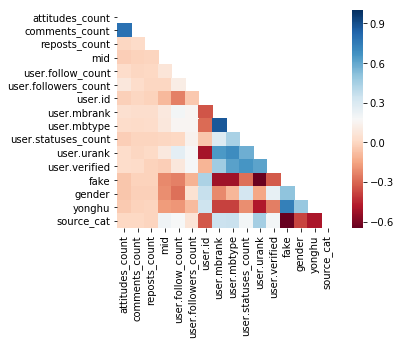

In [219]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('corr.pdf') as pdf_pages:
    corrplt = sns.heatmap(corr, square=True, cmap='RdBu', mask=mask)
    pdf_pages.savefig(figu)
    
plt.savefig('corr_new.svg')

In [214]:
from sklearn.ensemble import RandomForestClassifier
x_train = data.drop(['fake', 
       'raw_text',
       'source', 'user.description', 'user.gender', 'user.id', 
       'user.profile_url', 'user.profile_image_url',
       'user.screen_name', 
       'user.verified_reason'], axis=1)
rf = RandomForestClassifier(n_estimators=50, random_state=10).fit(x_train, data.fake)
# rf_score = rf.score(x_test, y_test)
rf_coef = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values()
# print(rf_coef, rf_score)

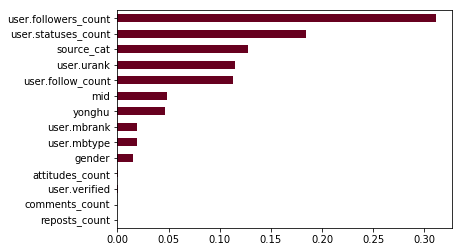

In [220]:

with PdfPages('fi.pdf') as pdf_pages:
    figu = plt.figure()
    fiplt = rf_coef.plot.barh(cmap='RdBu')
    pdf_pages.savefig(figu)
plt.savefig('fi_new.svg')

In [256]:
sns.set()

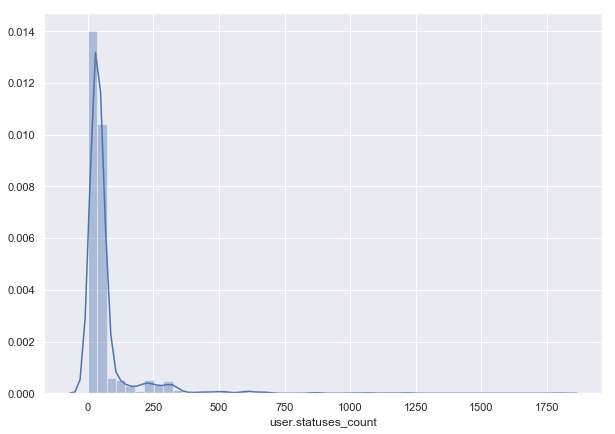

In [260]:
plt.figure(figsize=(10,7))
sns.distplot(datafake['user.statuses_count'])

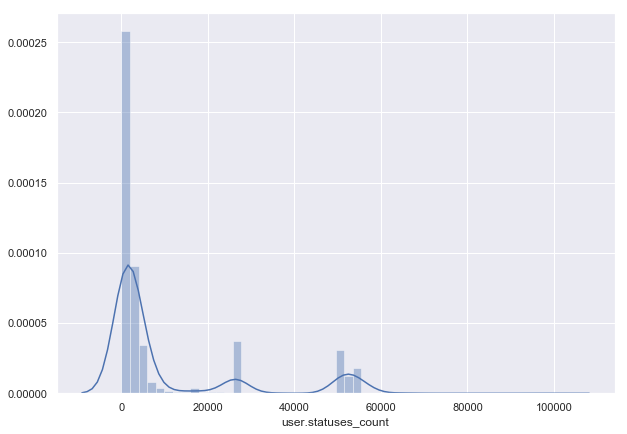

In [262]:
plt.figure(figsize=(10,7))
datatrue = data[data['fake']==0]
sns.distplot(datatrue.loc[datatrue['user.statuses_count'] < 100000, 'user.statuses_count'])
# sns.distplot(datatrue['user.statuses_count'], kde=False)